In [2]:
pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 11.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [4]:
pip install cvzone


  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26297 sha256=5a41dab03f6bd79bd352352973fca505bf4fc02c0190abece08bca24c6d2c6f3
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone



0: 640x640 1 person, 1 car, 1 truck, 3895.0ms
Speed: 5.3ms preprocess, 3895.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
FPS: 5.818019020705365e-10


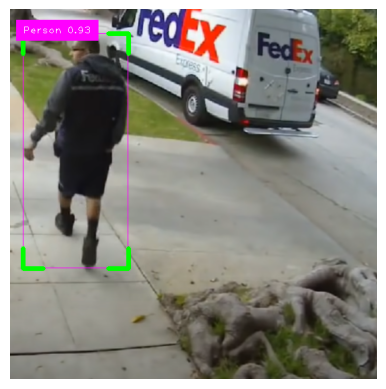

In [13]:
from ultralytics import YOLO
import cv2
import cvzone
import math
import time
from matplotlib import pyplot as plt


# Load YOLO model
model = YOLO("../Yolo-Weights/yolov8l.pt")

# Class names list
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"]

# Initialize video capture for webcam
# cap = cv2.VideoCapture(0)  # For Webcam, change the index if necessary
cap = cv2.VideoCapture("/content/0.png")  # For video file, uncomment and set the correct path
cap.set(3, 1280)  # Set width
cap.set(4, 720)  # Set height

prev_frame_time = 0

while True:
    success, img = cap.read()
    if not success:
        print("Failed to capture image")
        break

    # Run model on the image
    results = model(img, stream=True)
    for r in results:
        boxes = r.boxes
        for box in boxes:
            # Class Name
            cls = int(box.cls[0])

            # Check if the detected object is a person
            if classNames[cls] == "person":
                # Bounding Box coordinates
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h = x2 - x1, y2 - y1

                # Confidence score
                conf = math.ceil((box.conf[0] * 100)) / 100

                cvzone.cornerRect(img, (x1, y1, w, h))
                cvzone.putTextRect(img, f'Person {conf}', (max(0, x1), max(1, y1)), scale=1, thickness=1)

    # Calculate FPS
    new_frame_time = time.time()
    fps = 1 / (new_frame_time - prev_frame_time)
    prev_frame_time = new_frame_time
    print(f"FPS: {fps}")

    # Display the processed image inline
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Break after displaying the image once
    break

# Release the capture and destroy all windows
cap.release()
cv2.destroyAllWindows()